## 讀檔

In [1]:
# Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# print current working directory
print(os.getcwd())

C:\Users\i9400230\Python_ZT\Code


In [3]:
# Change working directory
os.chdir('C:\\Users\\i9400230\\Python_ZT\\Data') 
print(os.getcwd())

C:\Users\i9400230\Python_ZT\Data


In [4]:
#Import data
Full_history = pd.read_csv('fh_5yrs.csv')
Full_history.head()

,date,volume,open,high,low,close,adjclose,symbol
0,2020-07-02,257500,17.639999,17.740000,17.620001,17.709999,17.709999,AAAU
1,2020-07-01,468100,17.730000,17.730000,17.540001,17.680000,17.680000,AAAU
2,2020-06-30,319100,17.650000,17.799999,17.610001,17.780001,17.780001,AAAU
3,2020-06-29,405500,17.670000,17.690001,17.629999,17.680000,17.680000,AAAU
4,2020-06-26,335100,17.490000,17.670000,17.420000,17.670000,17.670000,AAAU


## 資料操作

In [18]:
# Full_history info
Full_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6852038 entries, 0 to 6852037
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   date      object 
 1   volume    int64  
 2   open      float64
 3   high      float64
 4   low       float64
 5   close     float64
 6   adjclose  float64
 7   symbol    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 418.2+ MB


In [10]:
# Full_history continuous variable describe
Full_history.describe()

,volume,open,high,low,close,adjclose
count,6.852038e+06,6.852038e+06,6.852038e+06,6.852038e+06,6.852038e+06,6.852038e+06
mean,1.015414e+06,2.980861e+02,3.058757e+02,2.910136e+02,2.967831e+02,2.932311e+02
std,4.833380e+06,1.158088e+05,1.182161e+05,1.135286e+05,1.151575e+05,1.143443e+05
min,1.000000e+00,1.000000e-03,0.000000e+00,0.000000e+00,1.000000e-03,-3.770961e+00
25%,1.870000e+04,1.195000e+01,1.213000e+01,1.175000e+01,1.194000e+01,1.077661e+01
50%,1.206000e+05,2.495000e+01,2.511000e+01,2.475000e+01,2.494000e+01,2.332580e+01
75%,5.863000e+05,4.790000e+01,4.835000e+01,4.741000e+01,4.790000e+01,4.538986e+01
max,2.156725e+09,6.915530e+07,7.058858e+07,6.843866e+07,6.951362e+07,6.902224e+07


In [17]:
# Stock Ticker unique
print(Full_history['symbol'].unique(),'\nUnique count of Ticker:',Full_history['symbol'].nunique())

['AAAU' 'AACG' 'AADR' ... 'ZYME' 'ZYNE' 'ZYXI'] 
Unique count of Ticker: 6335


In [19]:
# Stock Ticker Frequency table
pd.value_counts(Full_history.symbol).to_frame().reset_index()

,index,symbol
0,PBPB,1385
1,SGOL,1385
2,DIS,1385
3,GLOG,1385
4,WPP,1385
...,...,...
6330,HTLFP,4
6331,ADTX,3
6332,ALTA,3
6333,IPOC,2


## Group by 方法

In [5]:
# Date to datetime
Full_history.date = pd.to_datetime(Full_history.date)

In [6]:
# Store Ticker price each year
df = pd.DataFrame()
df['year'] = Full_history.date.map(lambda x: x.year)
df['symbol'] = Full_history.symbol
df['price'] = Full_history['close']

In [7]:
# Mean Close Price in 2020 of each Tickers
def MeanPricePerTicker(year=2020):
    Filter = (df['year'] == year)
    df_gp = df[Filter].groupby('symbol').mean()['price'].map(lambda x: round(x,2))
    return df_gp.sort_values(ascending=False)
MeanPricePerTicker()

symbol
VHI      2687392.46
RAND       16794.11
EFOI       14536.17
SRV         8960.60
APG         5933.50
            ...    
BRPAR          0.18
ENSV           0.16
HJLIW          0.15
HUSA           0.14
TBLTW          0.05
Name: price, Length: 6333, dtype: float64

In [8]:
# Mean Close Price per year
def MeanPricePeryear(ticker='all'):
    if ticker == 'all':
        df_gp = df.groupby('year').mean()['price'].map(lambda x: round(x,2))
    else:
        Filter = (df['symbol'] == ticker)
        df_gp = df[Filter].groupby('year').mean()['price'].map(lambda x: round(x,2))
    return df_gp
MeanPricePeryear()

year
2015    235.19
2016    114.13
2017     72.49
2018     62.53
2019    976.75
2020    127.53
Name: price, dtype: float64

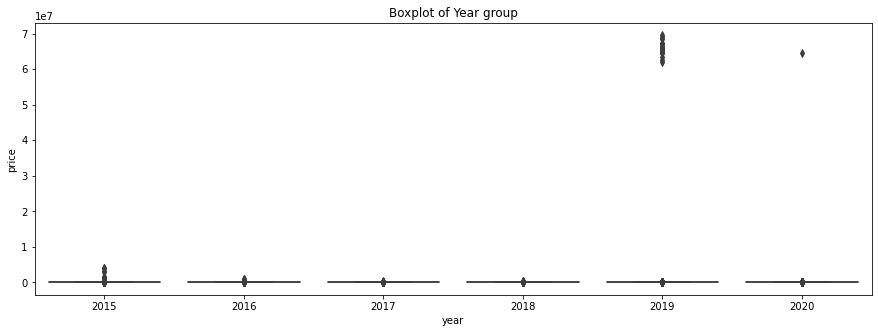

In [38]:
# Draw 6 Boxplots group by year
import seaborn as sns
plt.figure(figsize=(15,5))
sns.boxplot(x='year', y='price', data=df)
plt.title('Boxplot of Year group')
plt.show()

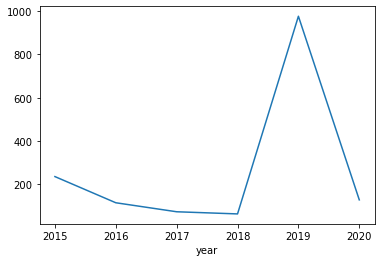

In [9]:
# Plot the price by year
MeanPricePeryear().plot()

## iloc,loc,ix方法

In [16]:
# Set symbol as index, find Ticker "VHI"
df1 = df.set_index('symbol')
df1.loc['VHI'].head()

,year,price
symbol,,
VHI,2020,10.14
VHI,2020,10.13
VHI,2020,10.48
VHI,2020,10.19
VHI,2020,9.57


In [19]:
# Not set symbol index, find Ticker "VHI"
Ticker_filter = (df['symbol'] == 'VHI')
df.loc[Ticker_filter].head()

,year,symbol,price
6431097,2020,VHI,10.14
6431098,2020,VHI,10.13
6431099,2020,VHI,10.48
6431100,2020,VHI,10.19
6431101,2020,VHI,9.57


In [18]:
# iloc method, find Ticker "VHI"
df.iloc[6431097:6431102,:]

,year,symbol,price
6431097,2020,VHI,10.14
6431098,2020,VHI,10.13
6431099,2020,VHI,10.48
6431100,2020,VHI,10.19
6431101,2020,VHI,9.57


## 找出極端的排序

In [20]:
# Nlargest
df.nlargest(3,'price')

,year,symbol,price
6431125,2019,VHI,69513616.0
6431126,2019,VHI,69155304.0
6431124,2019,VHI,68438664.0


In [9]:
# Full_history_Numeric
Full_history_Numeric = Full_history.loc[:,['volume', 'open', 'high', 'low', 'close', 'adjclose']]

In [10]:
# Statistical Outliers detect
feature_outliers = []
writer = pd.ExcelWriter('Stock_Outliers_sheets.xlsx', engine='xlsxwriter')

for feature in Full_history_Numeric.keys():
    Q1 = np.percentile(Full_history_Numeric[feature], 25)
    Q3 = np.percentile(Full_history_Numeric[feature], 75)
    step = 1.5*(Q3 - Q1)
    Outlier_Index = ~((Full_history_Numeric[feature] >= Q1 - step)&\
                       (Full_history_Numeric[feature] <= Q3 + step))
    Full_history_Numeric.loc[Full_history_Numeric.loc[Outlier_Index].index,:].to_excel(writer, sheet_name = feature)
    feature_outliers.append(Full_history_Numeric.loc[Full_history_Numeric.loc[Outlier_Index].index,:])
writer.save()

# Flatten list of outliers
outliers_flattened = []

for i, j in enumerate(feature_outliers):
    outliers_flattened.append(feature_outliers[i].index)
flat_list = [item for sublist in outliers_flattened for item in sublist]

In [11]:
# Count the number of features for which a given observation is considered an outlier
from collections import Counter
outlier_count = Counter(flat_list)
outliers = [observation for observation in outlier_count.elements() if outlier_count[observation] >= 3]
Full_history_Numeric.loc[Full_history_Numeric.loc[outliers].index,:]\
.to_csv('Real_Outliers.csv', encoding='utf_8_sig')

## 刪除資料

In [12]:
# Drop Outliers
Full_history_New = Full_history.drop(outliers)

In [13]:
# Store Ticker price each year
df = pd.DataFrame()
df['year'] = Full_history_New.date.map(lambda x: x.year)
df['symbol'] = Full_history_New.symbol
df['price'] = Full_history_New['close']

In [15]:
# MeanPricePerTicker
MeanPricePerTicker()

symbol
CBPO     100.99
BOND     100.87
VTHR     100.69
EMNT     100.04
VTWG      99.53
          ...  
BRPAR      0.18
ENSV       0.16
HJLIW      0.15
HUSA       0.14
TBLTW      0.05
Name: price, Length: 6079, dtype: float64

In [16]:
# Mean Close Price per year
MeanPricePeryear()

year
2015    29.31
2016    27.68
2017    29.52
2018    29.52
2019    27.50
2020    24.89
Name: price, dtype: float64

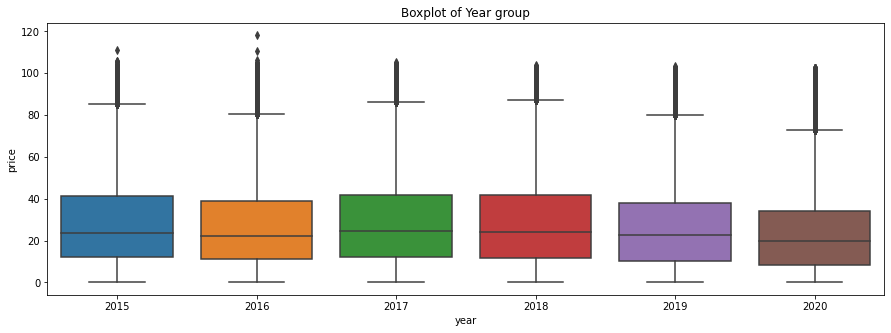

In [36]:
# Draw 6 Boxplots group by year
import seaborn as sns
plt.figure(figsize=(15,5))
sns.boxplot(x='year', y='price', data=df)
plt.title('Boxplot of Year group')
plt.show()

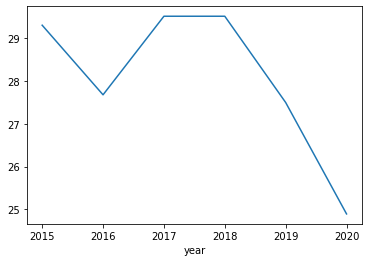

In [17]:
# Plot the price by year
MeanPricePeryear().plot()

## 處理NAN資料

In [22]:
# List the NANs in the data
Full_history_New.isnull().sum()

date        0
volume      0
open        0
high        0
low         0
close       0
adjclose    0
symbol      0
dtype: int64

## sort排序

In [32]:
# Group by Tickers then Sort by mean close price
Full_history_New.groupby('symbol')[['open','high','low','close']].mean().\
sort_values(by = 'close', ascending = False).head(20)

,open,high,low,close
symbol,,,,
RHS,99.820000,105.160004,69.510002,103.809998
MBB,101.814999,101.855000,101.755001,101.805000
CI,101.769997,102.559998,100.860001,101.459999
DEO,101.050000,101.802000,100.466499,101.365000
BOND,101.303913,101.456304,101.203261,101.312609
VBK,100.399998,102.169998,100.080002,101.060001
ECL,100.855001,101.860000,99.616250,101.042500
GLD,101.166667,101.436666,100.536667,100.983335
ZROZ,101.642500,101.817499,100.870001,100.962502


## 使用函數: apply

In [14]:
# Calculate the stock return((c-o)/o) 
Full_history_New['return'] = round((Full_history_New['close'] - Full_history_New['open'])/Full_history_New['open'],2)

In [41]:
# Stock Return describe
Full_history_New['return'].describe()

count    6.323292e+06
mean     9.592630e-05
std      6.660934e-01
min     -1.000000e+00
25%     -1.000000e-02
50%     -0.000000e+00
75%      1.000000e-02
max      1.549000e+03
Name: return, dtype: float64

In [15]:
# Calculate the stock return((c-o)/o) degree using apply function
Full_history_New['return_degree'] = Full_history_New['return'].\
apply(lambda x : 1 if x >= 0.01 else(2 if (x >= -0.01 and x <0.01) else 3))

In [46]:
# Stock Return degree describe
Full_history_New['return_degree'].describe() 

count    6.323292e+06
mean     1.861272e+00
std      6.584782e-01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      3.000000e+00
Name: return_degree, dtype: float64

## 處理時間序列

In [ ]:
# Date to datetime
# Full_history_New.date = pd.to_datetime(Full_history.date)

In [16]:
# Year, Month, Day
Full_history_New['year'] = Full_history_New.date.map(lambda x: x.year)
Full_history_New['month'] = Full_history_New.date.map(lambda x: x.month)
Full_history_New['day'] = Full_history_New.date.map(lambda x: x.day)

In [57]:
# View the data
Full_history_New.head()

,date,volume,open,high,low,close,adjclose,symbol,return,return_degree,year,month,day
0,2020-07-02,257500,17.639999,17.740000,17.620001,17.709999,17.709999,AAAU,0.00,2,2020,7,2
1,2020-07-01,468100,17.730000,17.730000,17.540001,17.680000,17.680000,AAAU,-0.00,2,2020,7,1
2,2020-06-30,319100,17.650000,17.799999,17.610001,17.780001,17.780001,AAAU,0.01,1,2020,6,30
3,2020-06-29,405500,17.670000,17.690001,17.629999,17.680000,17.680000,AAAU,0.00,2,2020,6,29
4,2020-06-26,335100,17.490000,17.670000,17.420000,17.670000,17.670000,AAAU,0.01,1,2020,6,26


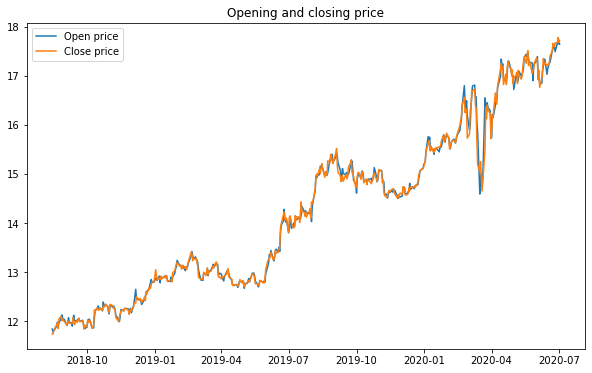

In [62]:
# First Ticker ('AAAU') price plot
plt.figure(figsize=(10,6))
#plt.style.use('ggplot')
plt.title("Opening and closing price")
df1 = Full_history_New[Full_history_New['symbol'] == 'AAAU']
plt.plot(df1['date'], df1['open'], label='Open price')
plt.plot(df1['date'], df1['close'], label='Close price')
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, 'Return_rolling_var_dayk')

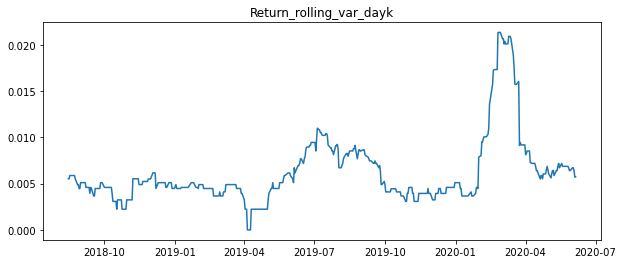

In [69]:
# 20day Rolling variance of Return of 'AAAU'
plt.figure(figsize = (10,4))
plt.plot(df1['date'],df1['return'].rolling(20).std())
plt.title('Return_rolling_var_dayk')

Text(0.5, 1.0, 'Return_rolling_var_dayk During Month')

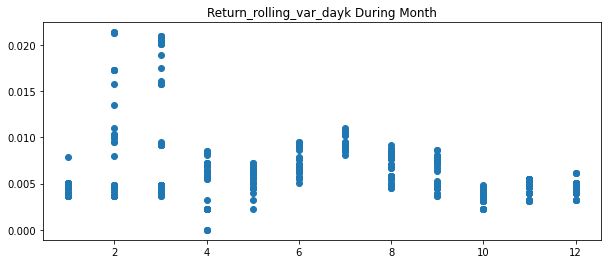

In [70]:
# 20day Rolling variance of Return of 'AAAU'(Month)
plt.figure(figsize = (10,4))
plt.scatter(df1['month'],df1['return'].rolling(20).std())
plt.title('Return_rolling_var_dayk During Month')

## 進行分類切割

In [17]:
# pd.cut
bins = [0, 3, 6, 9, 12]
df1['quarter'] = pd.cut(df1['month'], bins, labels=['Q1', 'Q2', 'Q3', 'Q4'])

NameError: name 'df1' is not defined

In [76]:
# View data
df1.head()

,date,volume,open,high,low,close,adjclose,symbol,return,return_degree,year,month,day,quarter
0,2020-07-02,257500,17.639999,17.740000,17.620001,17.709999,17.709999,AAAU,0.00,2,2020,7,2,Q3
1,2020-07-01,468100,17.730000,17.730000,17.540001,17.680000,17.680000,AAAU,-0.00,2,2020,7,1,Q3
2,2020-06-30,319100,17.650000,17.799999,17.610001,17.780001,17.780001,AAAU,0.01,1,2020,6,30,Q2
3,2020-06-29,405500,17.670000,17.690001,17.629999,17.680000,17.680000,AAAU,0.00,2,2020,6,29,Q2
4,2020-06-26,335100,17.490000,17.670000,17.420000,17.670000,17.670000,AAAU,0.01,1,2020,6,26,Q2


Text(0.5, 1.0, 'Return_rolling_var_dayk During Quarter')

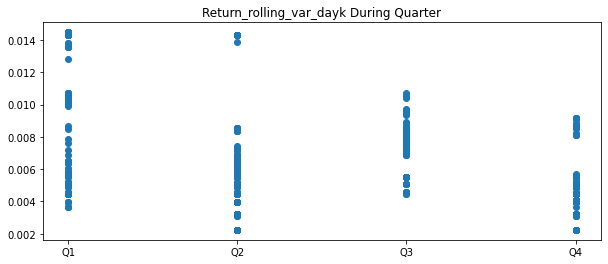

In [79]:
# 20day Rolling variance of Return of 'AAAU'(Month)
plt.figure(figsize = (10,4))
df2 = df1.sort_values(by = 'quarter')
plt.scatter(df2['quarter'],df2['return'].rolling(20).std())
plt.title('Return_rolling_var_dayk During Quarter')

##  資料型態轉換

In [82]:
# data type of Full_history_New
Full_history_New.dtypes

date             datetime64[ns]
volume                    int64
open                    float64
high                    float64
low                     float64
close                   float64
adjclose                float64
symbol                   object
return                  float64
return_degree             int64
year                      int64
month                     int64
day                       int64
dtype: object

In [83]:
# Float to integer
Full_history_New['close'].astype(int)

0          17
1          17
2          17
3          17
4          17
           ..
6852033     0
6852034     0
6852035     0
6852036     0
6852037     0
Name: close, Length: 6323292, dtype: int32

In [85]:
# Float to int to Str
Full_history_New['close'].astype(int).astype(str)

0          17
1          17
2          17
3          17
4          17
           ..
6852033     0
6852034     0
6852035     0
6852036     0
6852037     0
Name: close, Length: 6323292, dtype: object

## 字串處理

In [86]:
# Capitalize first letter
Full_history_New['symbol'].str.title()

0          Aaau
1          Aaau
2          Aaau
3          Aaau
4          Aaau
           ... 
6852033    Zyxi
6852034    Zyxi
6852035    Zyxi
6852036    Zyxi
6852037    Zyxi
Name: symbol, Length: 6323292, dtype: object

In [88]:
# Capitalize all letters
Full_history_New['symbol'].str.upper()

0          AAAU
1          AAAU
2          AAAU
3          AAAU
4          AAAU
           ... 
6852033    ZYXI
6852034    ZYXI
6852035    ZYXI
6852036    ZYXI
6852037    ZYXI
Name: symbol, Length: 6323292, dtype: object

In [87]:
# lower all letters
Full_history_New['symbol'].str.lower()

0          aaau
1          aaau
2          aaau
3          aaau
4          aaau
           ... 
6852033    zyxi
6852034    zyxi
6852035    zyxi
6852036    zyxi
6852037    zyxi
Name: symbol, Length: 6323292, dtype: object

In [89]:
# str replace
Full_history_New['symbol'].str.replace("A","1")

0          111U
1          111U
2          111U
3          111U
4          111U
           ... 
6852033    ZYXI
6852034    ZYXI
6852035    ZYXI
6852036    ZYXI
6852037    ZYXI
Name: symbol, Length: 6323292, dtype: object

In [90]:
# Str find Startwith
Full_history_New[Full_history_New['symbol'].str.startswith('AA')]

,date,volume,open,high,low,close,adjclose,symbol,return,return_degree,year,month,day
0,2020-07-02,257500,17.639999,17.740000,17.620001,17.709999,17.709999,AAAU,0.00,2,2020,7,2
1,2020-07-01,468100,17.730000,17.730000,17.540001,17.680000,17.680000,AAAU,-0.00,2,2020,7,1
2,2020-06-30,319100,17.650000,17.799999,17.610001,17.780001,17.780001,AAAU,0.01,1,2020,6,30
3,2020-06-29,405500,17.670000,17.690001,17.629999,17.680000,17.680000,AAAU,0.00,2,2020,6,29
4,2020-06-26,335100,17.490000,17.670000,17.420000,17.670000,17.670000,AAAU,0.01,1,2020,6,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18530,2015-01-08,2053000,60.959999,61.529999,60.919998,61.400002,55.312943,AAXJ,0.01,1,2015,1,8
18531,2015-01-07,837800,60.000000,60.369999,59.959999,60.360001,54.376041,AAXJ,0.01,1,2015,1,7
18532,2015-01-06,725900,59.599998,59.840000,59.040001,59.320000,53.439148,AAXJ,-0.00,2,2015,1,6
18533,2015-01-05,614000,60.610001,60.610001,59.880001,59.939999,53.997677,AAXJ,-0.01,2,2015,1,5


In [91]:
# Str find Endwith
Full_history_New[Full_history_New['symbol'].str.endswith('PL')]

,date,volume,open,high,low,close,adjclose,symbol,return,return_degree,year,month,day
12601,2016-07-26,56239800,96.820000,97.970001,96.419998,96.669998,90.916161,AAPL,-0.00,2,2016,7,26
12602,2016-07-25,40382900,98.250000,98.839996,96.919998,97.339996,91.546280,AAPL,-0.01,2,2016,7,25
12603,2016-07-22,28313700,99.260002,99.300003,98.309998,98.660004,92.787727,AAPL,-0.01,2,2016,7,22
12604,2016-07-21,32702000,99.830002,101.000000,99.129997,99.430000,93.511902,AAPL,-0.00,2,2016,7,21
12605,2016-07-20,26276000,100.000000,100.459999,99.739998,99.959999,94.010345,AAPL,-0.00,2,2016,7,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6768737,2015-01-08,22400,0.890000,0.930000,0.850000,0.900000,0.900000,XPL,0.01,1,2015,1,8
6768738,2015-01-07,16100,0.920000,0.920000,0.890000,0.900000,0.900000,XPL,-0.02,3,2015,1,7
6768739,2015-01-06,26900,0.960000,0.960000,0.890000,0.910000,0.910000,XPL,-0.05,3,2015,1,6
6768740,2015-01-05,10200,0.930000,0.960000,0.890000,0.910000,0.910000,XPL,-0.02,3,2015,1,5


## 類SQL邏輯操作

In [112]:
# Filter data
Filter = ((Full_history_New['month'] >= 8) & (Full_history_New['year'] >= 2018)) 
Full_history_New[Filter].head(10)

,date,volume,open,high,low,close,adjclose,symbol,return,return_degree,year,month,day
127,2019-12-31,169000,15.19,15.21,15.15,15.15,15.15,AAAU,-0.00,2,2019,12,31
128,2019-12-30,93400,15.11,15.13,15.11,15.11,15.11,AAAU,0.00,2,2019,12,30
129,2019-12-27,64600,15.08,15.11,15.07,15.08,15.08,AAAU,0.00,2,2019,12,27
130,2019-12-26,42600,15.06,15.10,15.04,15.07,15.07,AAAU,0.00,2,2019,12,26
131,2019-12-24,66400,14.87,14.97,14.87,14.96,14.96,AAAU,0.01,1,2019,12,24
132,2019-12-23,95600,14.78,14.83,14.78,14.82,14.82,AAAU,0.00,2,2019,12,23
133,2019-12-20,25500,14.77,14.77,14.74,14.74,14.74,AAAU,-0.00,2,2019,12,20
134,2019-12-19,28800,14.73,14.78,14.72,14.76,14.76,AAAU,0.00,2,2019,12,19
135,2019-12-18,134200,14.70,14.76,14.70,14.73,14.73,AAAU,0.00,2,2019,12,18
136,2019-12-17,24100,14.72,14.74,14.71,14.72,14.72,AAAU,0.00,2,2019,12,17


In [109]:
# DataFrame filter 
Full_history_New.filter(items = ['symbol', 'close']).head()

,symbol,close
0,AAAU,17.709999
1,AAAU,17.680000
2,AAAU,17.780001
3,AAAU,17.680000
4,AAAU,17.670000


In [110]:
# DataFrame filter (end with e)
Full_history_New.filter(regex='e$', axis=1).head()

,date,volume,close,adjclose,return_degree
0,2020-07-02,257500,17.709999,17.709999,2
1,2020-07-01,468100,17.680000,17.680000,2
2,2020-06-30,319100,17.780001,17.780001,1
3,2020-06-29,405500,17.680000,17.680000,2
4,2020-06-26,335100,17.670000,17.670000,1


In [111]:
# DataFrame filter (se like)
Full_history_New.filter(like='se', axis=1).head()

,close,adjclose
0,17.709999,17.709999
1,17.680000,17.680000
2,17.780001,17.780001
3,17.680000,17.680000
4,17.670000,17.670000


In [145]:
# Append data (concadenate)
Import_list = ['AAPL', 'MSFT']
result = None

for i in Import_list:
    Data_Path = os.path.join(os.getcwd(), 'full_history\\%s.csv'%(i))
    df_ = pd.read_csv(Data_Path)
    print("Importing : %s" %(i), "Data Path :%s"%(Data_Path),"\nShape of %s:%s"%(i,df_.shape),\
          "\n==========================================")
    if result is None:
        result = df_
    else:
        result = result.append(df_)
print("Shape of append result :",result.shape)

Importing : AAPL Data Path :C:\Users\i9400230\Python_ZT\Data\full_history\AAPL.csv 
Shape of AAPL:(9973, 7) 
Importing : MSFT Data Path :C:\Users\i9400230\Python_ZT\Data\full_history\MSFT.csv 
Shape of MSFT:(8648, 7) 
Shape of append result : (18621, 7)


## 搜尋資料: loc

In [149]:
# Vague Search
Filter = Full_history_New['symbol'].str.contains('AA|Z')
Full_history_New.loc[Filter]

,date,volume,open,high,low,close,adjclose,symbol,return,return_degree,year,month,day
0,2020-07-02,257500,17.639999,17.740000,17.620001,17.709999,17.709999,AAAU,0.00,2,2020,7,2
1,2020-07-01,468100,17.730000,17.730000,17.540001,17.680000,17.680000,AAAU,-0.00,2,2020,7,1
2,2020-06-30,319100,17.650000,17.799999,17.610001,17.780001,17.780001,AAAU,0.01,1,2020,6,30
3,2020-06-29,405500,17.670000,17.690001,17.629999,17.680000,17.680000,AAAU,0.00,2,2020,6,29
4,2020-06-26,335100,17.490000,17.670000,17.420000,17.670000,17.670000,AAAU,0.01,1,2020,6,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6852033,2015-01-12,10000,0.140000,0.140000,0.140000,0.140000,0.136302,ZYXI,0.00,2,2015,1,12
6852034,2015-01-09,200,0.150000,0.150000,0.150000,0.150000,0.146038,ZYXI,0.00,2,2015,1,9
6852035,2015-01-07,8100,0.140000,0.150000,0.130000,0.150000,0.146038,ZYXI,0.07,1,2015,1,7
6852036,2015-01-05,33200,0.220000,0.220000,0.140000,0.160000,0.155774,ZYXI,-0.27,3,2015,1,5


## 合併資料框

In [76]:
# Import AAPL
Data_Path = os.path.join(os.getcwd(), 'full_history\\AAPL.csv')
AAPL = pd.read_csv(Data_Path)
AAPL['symbol'] = 'AAPL'
AAPL['date'] = pd.to_datetime(AAPL['date'])
AAPL = AAPL.loc[:,['symbol', 'date', 'close']]
DF_Whole = Full_history_New.loc[:,['symbol', 'date']]

In [77]:
# Data Shape
print('DF_Whole shape: %s\nAAPL shape: %s'%(DF_Whole.shape,AAPL.shape))

DF_Whole shape: (6323292, 2)
AAPL shape: (9973, 3)


In [78]:
# Join without set Index (left)
JoinWoIx = DF_Whole.join(AAPL,lsuffix='_caller', rsuffix='_other')
print('JoinWoIx shape: (%s,%s)'%(JoinWoIx.shape))
JoinWoIx.head()

JoinWoIx shape: (6323292,5)


,symbol_caller,date_caller,symbol_other,date_other,close
0,AAAU,2020-07-02,AAPL,2020-07-02,364.109985
1,AAAU,2020-07-01,AAPL,2020-07-01,364.109985
2,AAAU,2020-06-30,AAPL,2020-06-30,364.799988
3,AAAU,2020-06-29,AAPL,2020-06-29,361.779999
4,AAAU,2020-06-26,AAPL,2020-06-26,353.630005


In [79]:
# Join without set Index (right)
JoinWoIx = AAPL.join(DF_Whole,lsuffix='_caller', rsuffix='_other')
print('JoinWoIx shape: (%s,%s)'%(JoinWoIx.shape))
JoinWoIx.head()

JoinWoIx shape: (9973,5)


,symbol_caller,date_caller,close,symbol_other,date_other
0,AAPL,2020-07-02,364.109985,AAAU,2020-07-02
1,AAPL,2020-07-01,364.109985,AAAU,2020-07-01
2,AAPL,2020-06-30,364.799988,AAAU,2020-06-30
3,AAPL,2020-06-29,361.779999,AAAU,2020-06-29
4,AAPL,2020-06-26,353.630005,AAAU,2020-06-26


In [80]:
# Set Index
AAPL = AAPL.set_index(['symbol','date'])
DF_Whole = DF_Whole.set_index(['symbol','date'])

In [89]:
# Data Shape
print('DF_Whole(only AAPL) shape: %s\nAAPL shape: %s'%(DF_Whole.loc['AAPL'].shape,AAPL.shape))

DF_Whole(only AAPL) shape: (106, 0)
AAPL shape: (9973, 1)


In [83]:
# Join with set Index (Inner Join)
JoinWIx = DF_Whole.join(AAPL, on = ['symbol','date'], how = 'inner')
print('JoinWIx shape: (%s,%s)'%(JoinWIx.shape))
JoinWIx.head()

JoinWIx shape: (106,1)


close
symbol date                 
AAPL   2016-07-26  96.669998
       2016-07-25  97.339996
       2016-07-22  98.660004
       2016-07-21  99.430000
       2016-07-20  99.959999

## 資料圖形化

In [100]:
# Import Bollinger_bands
from pyti.bollinger_bands import upper_bollinger_band as ubb
from pyti.bollinger_bands import middle_bollinger_band as mbb
from pyti.bollinger_bands import lower_bollinger_band as lbb
from pyti.bollinger_bands import percent_bandwidth as percent_b

In [101]:
# Initialize the short and long windows
window = 14
no_std = 1.3
band_per = 0.2

# AAAU
AAAU = Full_history_New[Full_history_New['symbol'] == 'AAAU']

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame()

# Bollinger Band
signals['Price'] = AAAU['close']
signals['upper_band'] = ubb(AAAU['close'], period = window, std_mult = no_std)
signals['mid_band'] = mbb(AAAU['close'], period = window, std = no_std)
signals['lower_band'] = lbb(AAAU['close'], period = window, std = no_std)
signals['percent_b'] = percent_b(AAAU['close'], period = window, std = no_std)

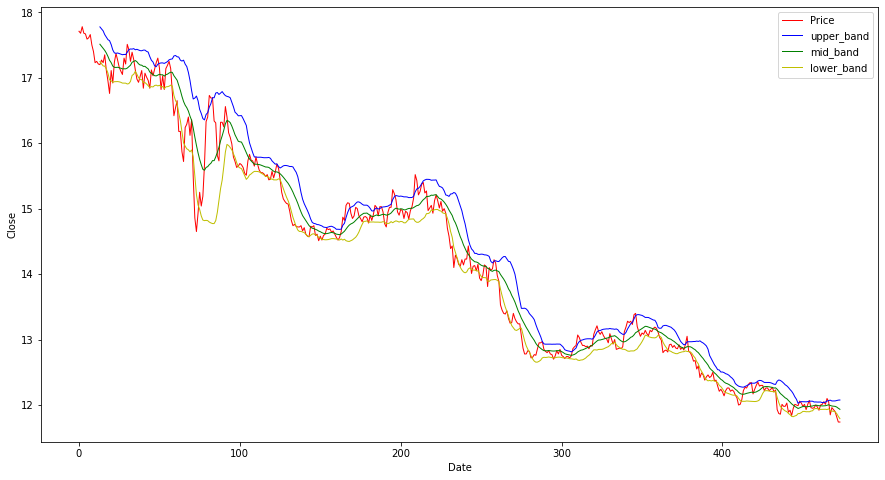

In [104]:
# Plot Bollinger Band of Ticker AAAU
fig = plt.figure(figsize=(15,8))

ax1 = fig.add_subplot(111,  xlabel = 'Date',ylabel='Close')

signals['Price'].plot(ax=ax1, color='r', lw=1, label = 'Price',legend = True)
signals['upper_band'].plot(ax=ax1, color = 'b', lw= 1, label = 'upper_band',legend = True)
signals['mid_band'].plot(ax=ax1, color = 'g', lw= 1, label = 'mid_band',legend = True)
signals['lower_band'].plot(ax=ax1, color = 'y', lw= 1, label = 'lower_band',legend = True)

## 存檔

In [105]:
# Save Full_history_New file to csv
Full_history_New.to_csv('Full_history_New.csv')